## Importing The Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Loading The Data

In [2]:
df = pd.read_csv("../data/togo-dapaong_qc.csv")
print(df.head())

          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-25 00:01 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1  2021-10-25 00:02 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2  2021-10-25 00:03 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3  2021-10-25 00:04 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4  2021-10-25 00:05 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.4  227.6      1.1  977         0            0.0   24.7   24.4   
1      0.4  229.3      0.7  977         0            0.0   24.7   24.4   
2      0.3  228.5      2.9  977         0            0.0   24.7   24.4   
3      0.3  229.1      4.6  977         0            0.0   24.7   24.4   
4      0.4  227.5      1.6  977         0            0.0   24.7   24.4   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  


## Summary Statistics & Missing Value Report

In [3]:
print("The description of the numeric columns:")
print(df.describe)

The description of the numeric columns:
<bound method NDFrame.describe of                Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0       2021-10-25 00:01 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1       2021-10-25 00:02 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2       2021-10-25 00:03 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3       2021-10-25 00:04 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4       2021-10-25 00:05 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   
...                  ...  ...  ...  ...   ...   ...   ...   ...  ...     ...   
525595  2022-10-24 23:56 -0.8  0.0  0.0   0.0   0.0  25.2  53.8  0.0     0.0   
525596  2022-10-24 23:57 -0.9  0.0  0.0   0.0   0.0  25.3  53.5  0.0     0.0   
525597  2022-10-24 23:58 -1.0  0.0  0.0   0.0   0.0  25.3  53.4  0.0     0.0   
525598  2022-10-24 23:59 -1.1  0.0  0.0   0.0   0.0  25.4  53.5  0.0     0.0   
525599  2022-10-25 00:00 -1.2  0.0  0.0   0.0 

In [4]:
print("Missing values per column:")
print(df.isna().sum())


Missing values per column:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [5]:
missing = (df.isna().sum() / len(df)) * 100
print("\nColumns with >5% missing:")
print(missing[missing > 5])


Columns with >5% missing:
Comments    100.0
dtype: float64


## Outlier Detection And Basic Cleaning

In [6]:
# compute z-scores
key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

z_scores = np.abs(stats.zscore(df[key_cols].select_dtypes(include=[np.number])))
outliers = (z_scores > 3)
print("Outliers per column:")
print(outliers.sum())

Outliers per column:
12550


In [7]:
# Replace or drop outliers
df_clean = df.copy()
df_clean[key_cols] = df_clean[key_cols].mask(outliers)

In [8]:
# Impute missing values (with median)
for col in key_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

In [9]:
# export clean data
df_clean.to_csv("../data/togo_clean.csv", index=False)

## Time Series Analysis

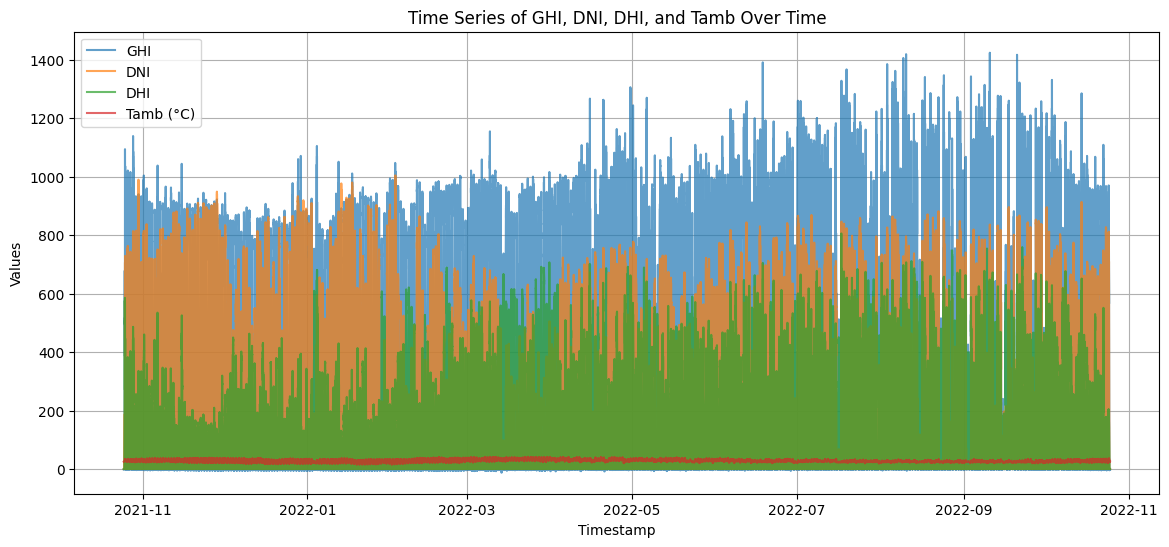

In [10]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.sort_values('Timestamp')

plt.figure(figsize=(14,6))
plt.plot(df['Timestamp'], df['GHI'], label='GHI', alpha=0.7)
plt.plot(df['Timestamp'], df['DNI'], label='DNI', alpha=0.7)
plt.plot(df['Timestamp'], df['DHI'], label='DHI', alpha=0.7)
plt.plot(df['Timestamp'], df['Tamb'], label='Tamb (°C)', alpha=0.7)
plt.xlabel("Timestamp")
plt.ylabel("Values")
plt.title("Time Series of GHI, DNI, DHI, and Tamb Over Time")
plt.legend()
plt.grid(True)
plt.show()

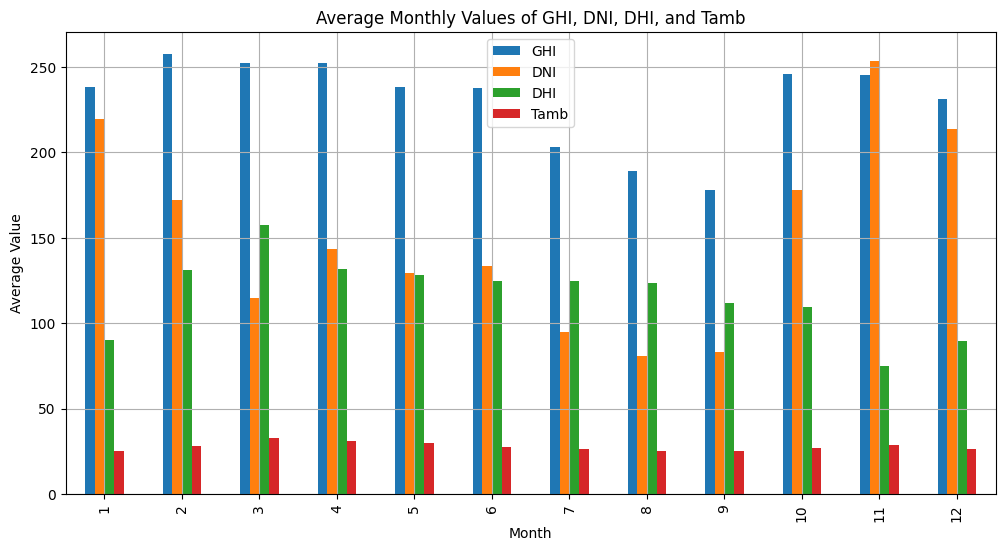

In [11]:
## monthly patterns
df['Month'] = df['Timestamp'].dt.month

monthly_means = df.groupby('Month')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

monthly_means.plot(kind='bar', figsize=(12,6))
plt.title("Average Monthly Values of GHI, DNI, DHI, and Tamb")
plt.xlabel("Month")
plt.ylabel("Average Value")
plt.legend()
plt.grid(True)
plt.show()

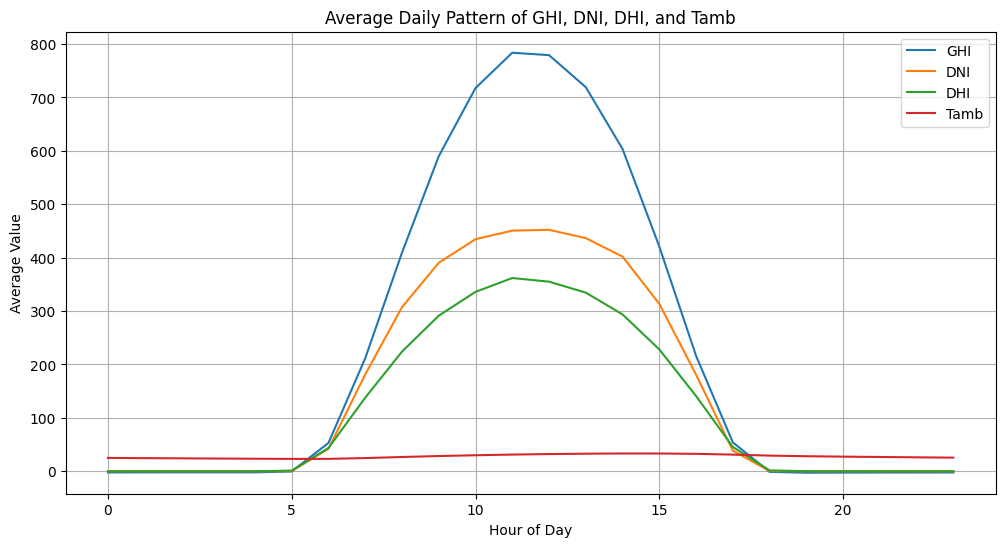

In [12]:
##daily trend
df['Hour'] = df['Timestamp'].dt.hour
hourly_means = df.groupby('Hour')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

hourly_means.plot(figsize=(12,6))
plt.title("Average Daily Pattern of GHI, DNI, DHI, and Tamb")
plt.xlabel("Hour of Day")
plt.ylabel("Average Value")
plt.grid(True)
plt.show()

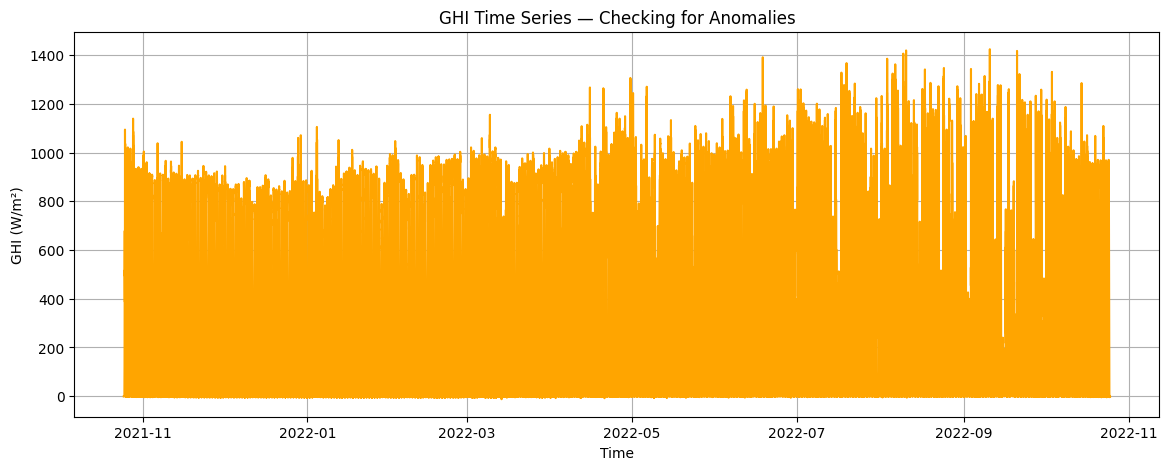

In [13]:
## detect anomalies
plt.figure(figsize=(14,5))
plt.plot(df['Timestamp'], df['GHI'], color='orange')
plt.title("GHI Time Series — Checking for Anomalies")
plt.xlabel("Time")
plt.ylabel("GHI (W/m²)")
plt.grid(True)
plt.show()


## Cleaning Impact

In [14]:
# Group by the 'Cleaning' flag (1 = cleaned, 0 = not cleaned)
cleaning_effect = df.groupby('Cleaning')[['ModA', 'ModB']].mean()
print(cleaning_effect)

                ModA        ModB
Cleaning                        
0         225.979064  219.401351
1         535.186477  532.211744


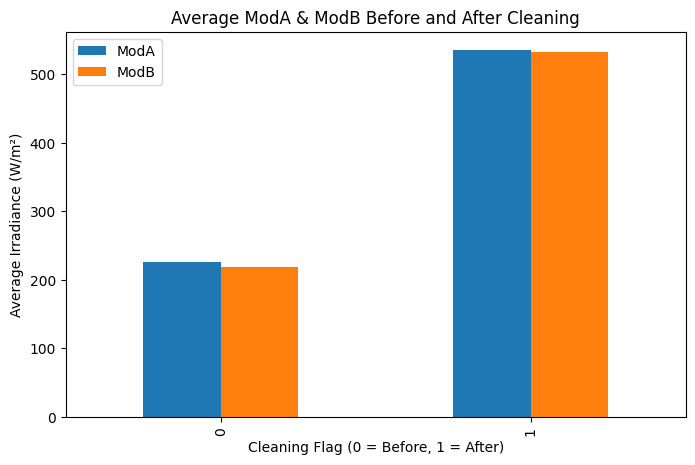

In [15]:
cleaning_effect.plot(kind='bar', figsize=(8,5))
plt.title('Average ModA & ModB Before and After Cleaning')
plt.xlabel('Cleaning Flag (0 = Before, 1 = After)')
plt.ylabel('Average Irradiance (W/m²)')
plt.legend(['ModA', 'ModB'])
plt.show()


## Correlation & Relatoinship Analysis

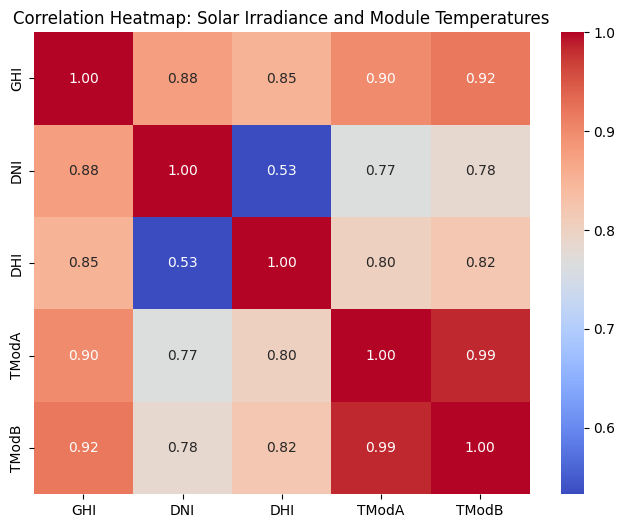

In [16]:
corr_columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
corr_matrix = df[corr_columns].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Solar Irradiance and Module Temperatures')
plt.show()

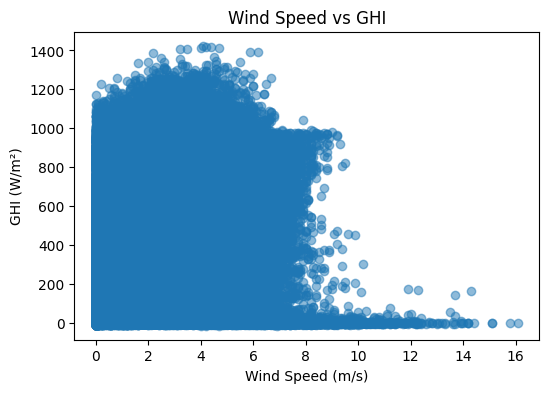

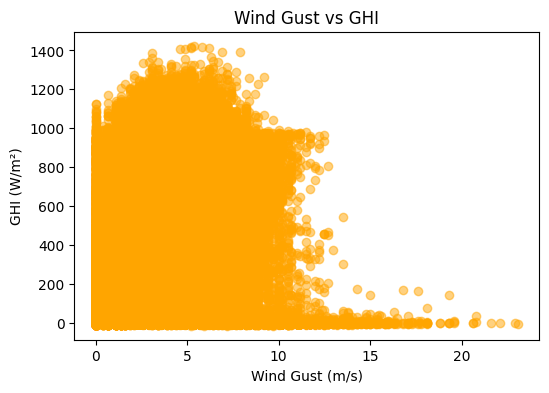

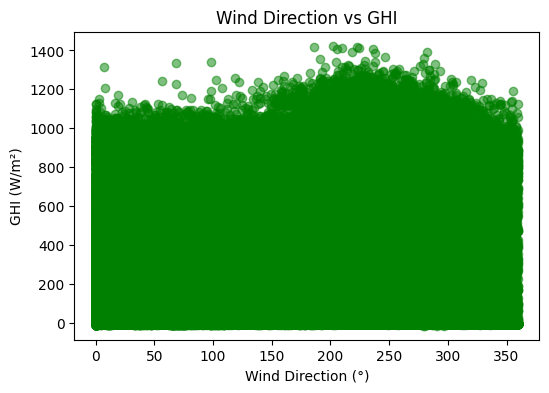

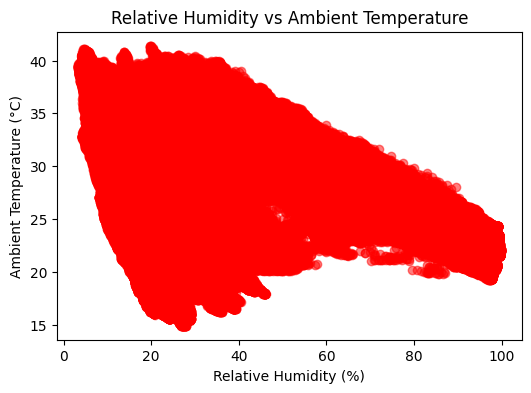

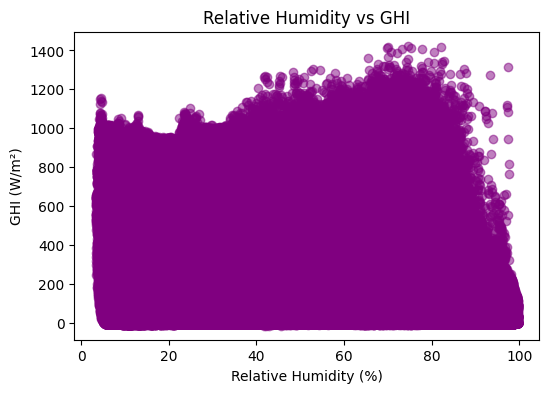

In [17]:

plt.figure(figsize=(6,4))
plt.scatter(df['WS'], df['GHI'], alpha=0.5)
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('GHI (W/m²)')
plt.title('Wind Speed vs GHI')
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(df['WSgust'], df['GHI'], alpha=0.5, color='orange')
plt.xlabel('Wind Gust (m/s)')
plt.ylabel('GHI (W/m²)')
plt.title('Wind Gust vs GHI')
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(df['WD'], df['GHI'], alpha=0.5, color='green')
plt.xlabel('Wind Direction (°)')
plt.ylabel('GHI (W/m²)')
plt.title('Wind Direction vs GHI')
plt.show()


plt.figure(figsize=(6,4))
plt.scatter(df['RH'], df['Tamb'], alpha=0.5, color='red')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (°C)')
plt.title('Relative Humidity vs Ambient Temperature')
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(df['RH'], df['GHI'], alpha=0.5, color='purple')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')
plt.title('Relative Humidity vs GHI')
plt.show()


## Wind & Distribution Analysis

<Figure size 800x800 with 0 Axes>

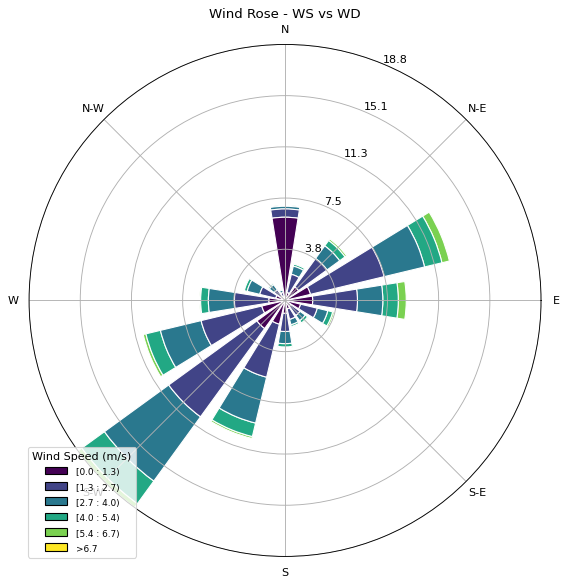

In [18]:
from windrose import WindroseAxes
df = pd.read_csv("../data/togo_clean.csv", parse_dates=['Timestamp'])
fig = plt.figure(figsize=(8,8))
ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend(title="Wind Speed (m/s)")
plt.title("Wind Rose - WS vs WD")
plt.show()


## Temperature Analysis

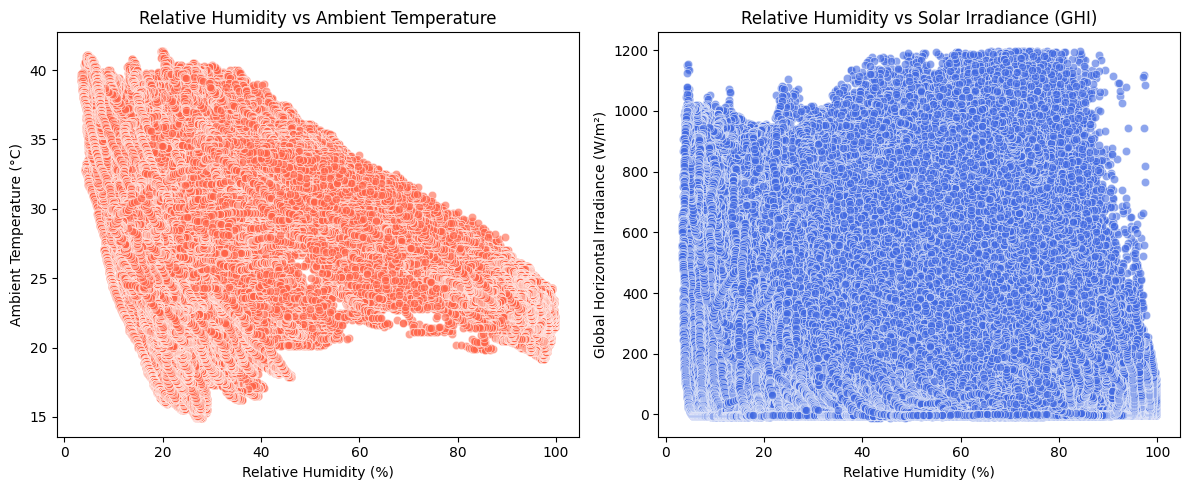

In [19]:
df = pd.read_csv("../data/togo_clean.csv", parse_dates=['Timestamp'])
plt.figure(figsize=(12,5))

# RH vs Tamb
plt.subplot(1, 2, 1)
sns.scatterplot(x='RH', y='Tamb', data=df, color='tomato', alpha=0.6)
plt.title("Relative Humidity vs Ambient Temperature")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("Ambient Temperature (°C)")

# RH vs GHI
plt.subplot(1, 2, 2)
sns.scatterplot(x='RH', y='GHI', data=df, color='royalblue', alpha=0.6)
plt.title("Relative Humidity vs Solar Irradiance (GHI)")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("Global Horizontal Irradiance (W/m²)")

plt.tight_layout()
plt.show()


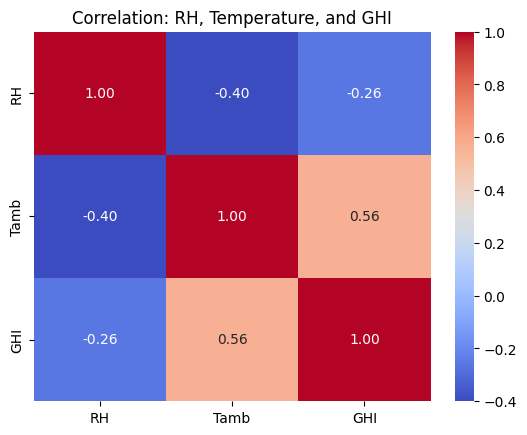

In [20]:
corr = df[['RH', 'Tamb', 'GHI']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation: RH, Temperature, and GHI")
plt.show()


## Bubble Chart

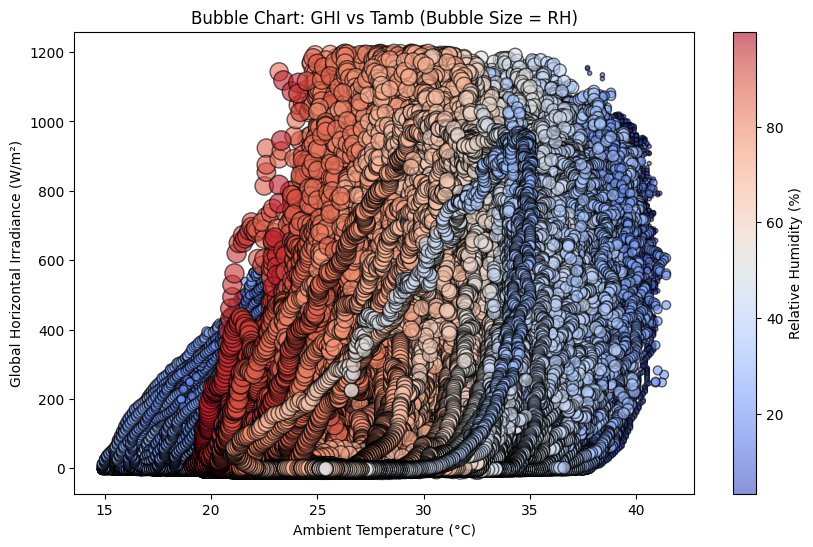

In [21]:
plt.figure(figsize=(10,6))
plt.scatter(
    x=df['Tamb'], 
    y=df['GHI'], 
    s=df['RH'] * 2,    # multiply to adjust bubble size
    c=df['RH'],        # color by humidity for extra clarity
    cmap='coolwarm', 
    alpha=0.6,
    edgecolors='k'
)
plt.title("Bubble Chart: GHI vs Tamb (Bubble Size = RH)")
plt.xlabel("Ambient Temperature (°C)")
plt.ylabel("Global Horizontal Irradiance (W/m²)")
plt.colorbar(label="Relative Humidity (%)")
plt.show()
